# 🧭 Handling Missing Values in Machine Learning — California Housing Dataset

This notebook covers:
- Exploring missing data
- Dropping missing values
- Simple imputation (mean/median/mode)
- Advanced imputation (KNN, Iterative Imputer)
- Model performance comparison

---

## 📦 1. Load and Explore Dataset


In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# Load California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 🧪 2. Introduce Missing Values

In [2]:
rng = np.random.default_rng(42)
missing_mask = rng.random(df.shape) < 0.1  # 10% missing values randomly
df_missing = df.mask(missing_mask)

print("Missing values per column:")
print(df_missing.isnull().sum())

Missing values per column:
MedInc        2060
HouseAge      2077
AveRooms      2022
AveBedrms     2072
Population    1962
AveOccup      2115
Latitude      2037
Longitude     2123
target        2003
dtype: int64


## 📊 3. Visualize Missingness

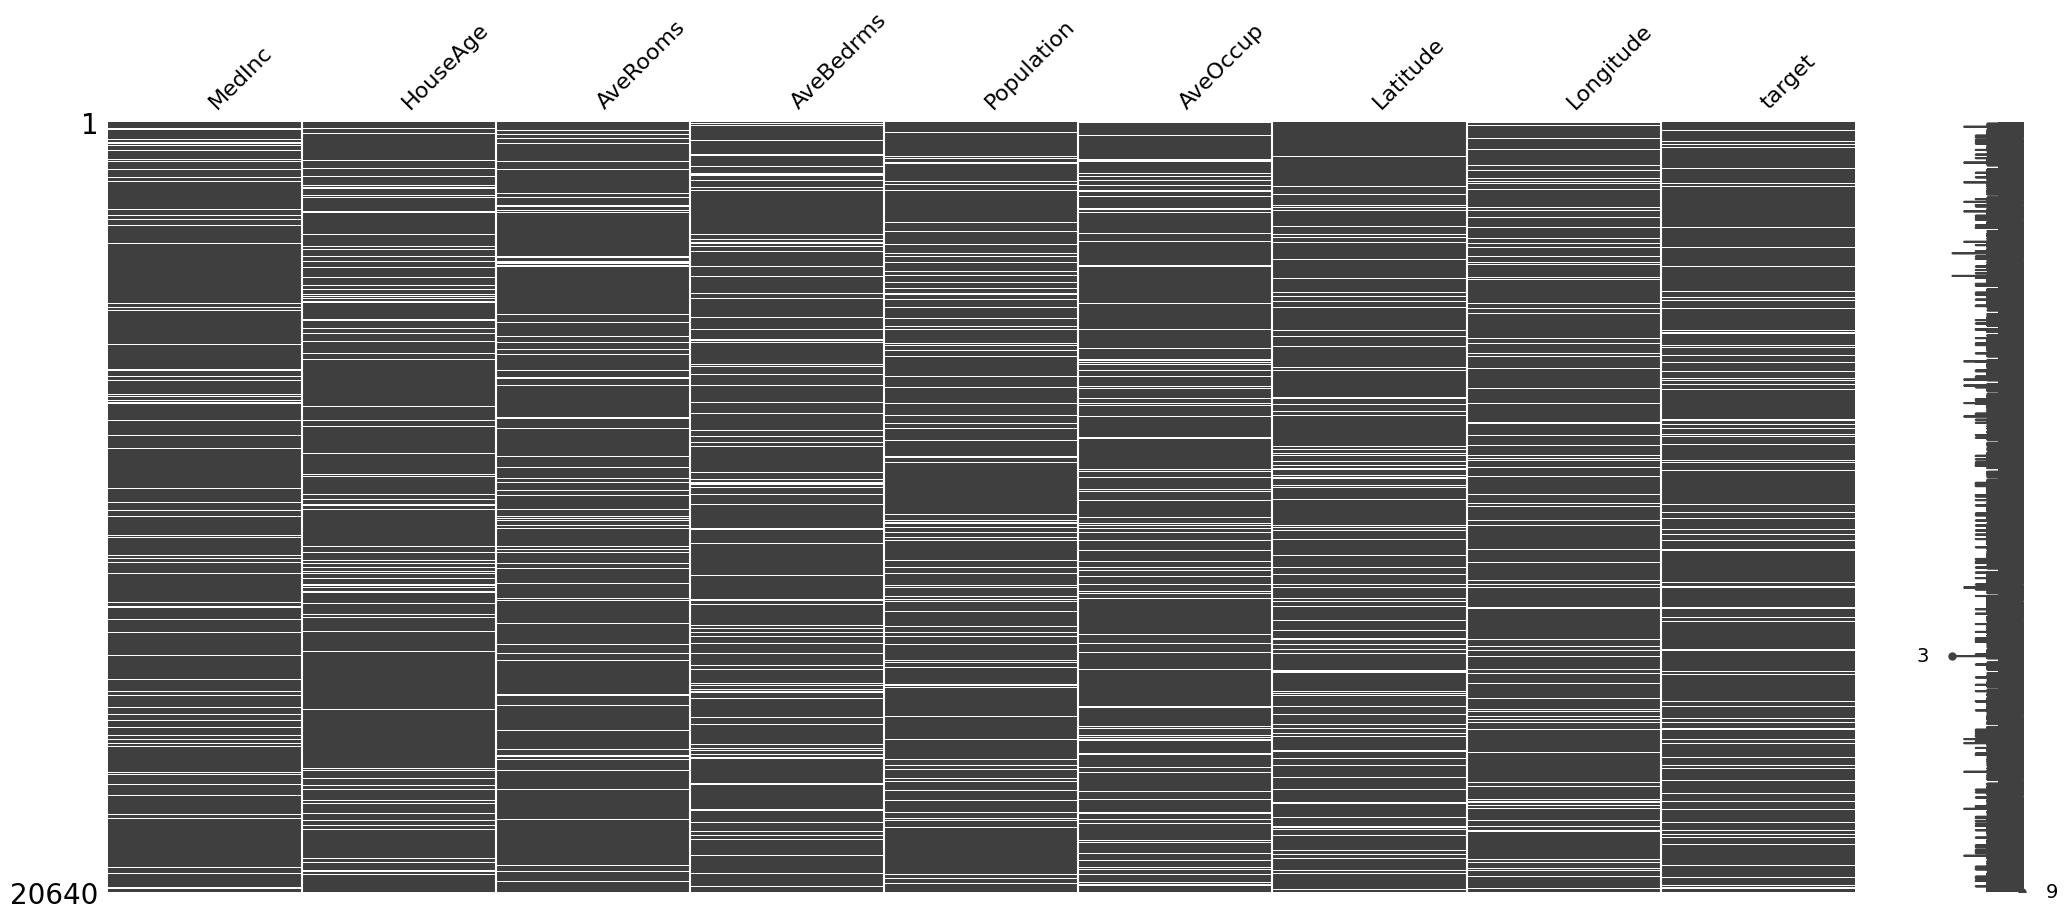

In [3]:
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(df_missing)
plt.show()


## 🧹 4. Handle Missing Values — Dropping Rows

In [4]:
df_drop = df_missing.dropna()
print("Shape before:", df_missing.shape)
print("Shape after dropping rows:", df_drop.shape)

Shape before: (20640, 9)
Shape after dropping rows: (8087, 9)


## 🧮 5. Simple Imputation (Mean)

In [5]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(df_missing), columns=df_missing.columns)

df_mean_imputed.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

## 🧮 6. Simple Imputation (Median)

In [6]:
median_imputer = SimpleImputer(strategy='median')
df_median_imputed = pd.DataFrame(median_imputer.fit_transform(df_missing), columns=df_missing.columns)

df_median_imputed.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

## 🤖 7. Advanced Imputation — KNN Imputer

In [7]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_missing), columns=df_missing.columns)

df_knn_imputed.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

## 🧠 8. Advanced Imputation — Iterative Imputer (MICE)

In [8]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=42)
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_missing), columns=df_missing.columns)

df_mice_imputed.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

## 🧪 9. Compare Model Performance

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def evaluate_model(df_imputed, name):
    X = df_imputed.drop(columns=['target'])
    y = df_imputed['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: MSE = {mse:.4f}")

evaluate_model(df, "No Missing Values")
evaluate_model(df_drop, "Drop Rows")
evaluate_model(df_mean_imputed, "Mean Imputation")
evaluate_model(df_median_imputed, "Median Imputation")
evaluate_model(df_knn_imputed, "KNN Imputation")
evaluate_model(df_mice_imputed, "MICE Imputation")

No Missing Values: MSE = 0.5559
Drop Rows: MSE = 0.4993
Mean Imputation: MSE = 0.6692
Median Imputation: MSE = 0.6852
KNN Imputation: MSE = 0.5573
MICE Imputation: MSE = 0.4644


---

## 🏁 Summary
- **Dropping rows**: simple but loses data.
- **Mean/Median imputation**: fast, may bias variance.
- **KNN Imputation**: uses nearest neighbors, good balance.
- **MICE**: most robust, but computationally heavy.
- Proper imputation improves model performance.

✅ Try changing missingness % or imputation methods to see how MSE changes.
